In [1]:
import pandas as pd
import numpy as np
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data\housing.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

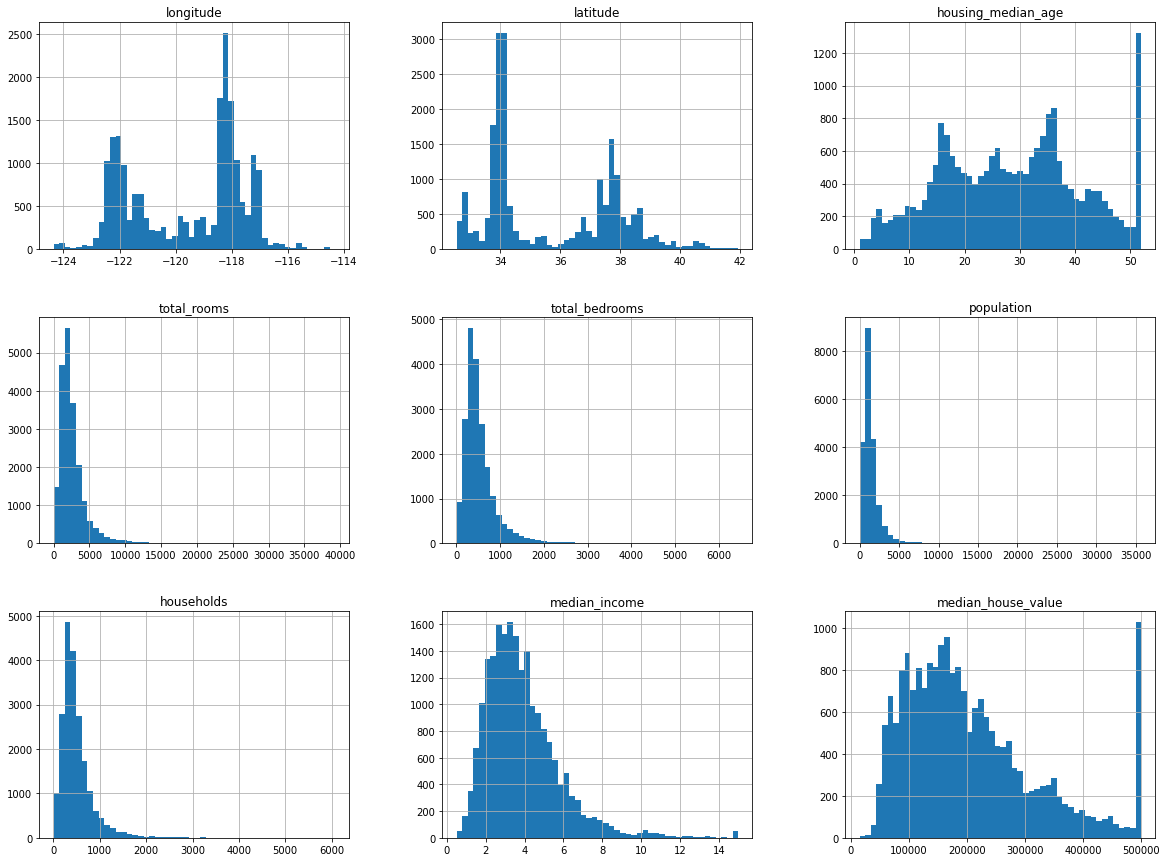

In [6]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Create a Test Set

In [7]:
train_set, test_set = sklearn.model_selection.train_test_split(data,test_size=0.2,random_state=42)

<AxesSubplot:>

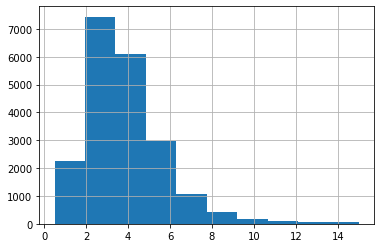

In [8]:
data["median_income"].hist()

In [21]:
data["income_cat"] = pd.cut(data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


## Since the median income is a continuous numerical attribute

most median income values are clustered around 1.5 to 6 (i.e.,
$15,000–$60,000), but some median incomes go far beyond 6. It is important to have
a sufficient number of instances in your dataset for each stratum, or else the estimate
of a stratum’s importance may be biased. This means that you should not have too
many strata, and each stratum should be large enough. (stratum mean layer)

<AxesSubplot:>

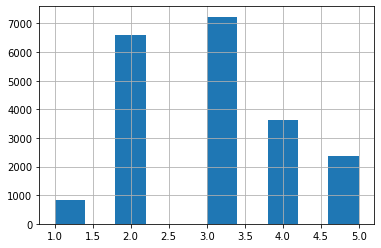

In [22]:
data["income_cat"].hist()

In [24]:
split = sklearn.model_selection.StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=24)
for train_index, test_index in split.split(data,data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [26]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

## Discover and Visualize the Data to Gain Insights

In [27]:
# Let’s create a copy so that you can play with it without harming the training set:
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

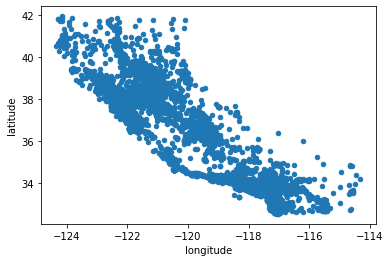

In [29]:
housing.plot(kind="scatter", x="longitude", y="latitude")

## Looking for Correlations


In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690035
total_rooms           0.136261
housing_median_age    0.101454
households            0.067924
total_bedrooms        0.052024
population           -0.019773
longitude            -0.044723
latitude             -0.145020
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

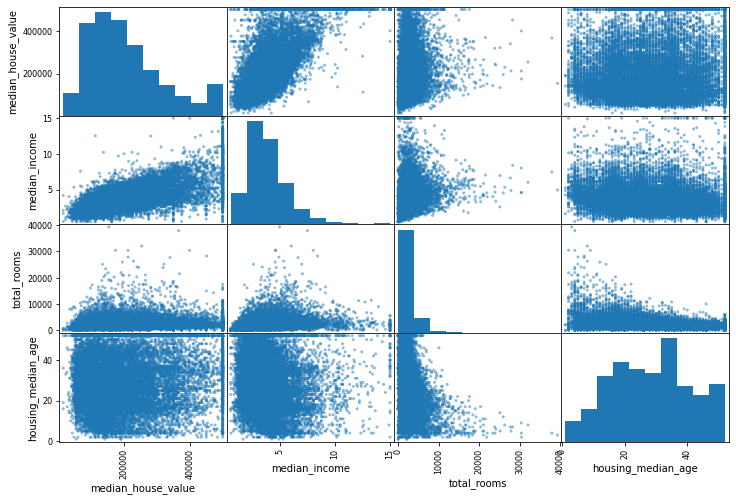

In [31]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

## Creating some new attributes for logical implications 

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690035
rooms_per_household         0.144192
total_rooms                 0.136261
housing_median_age          0.101454
households                  0.067924
total_bedrooms              0.052024
population                 -0.019773
population_per_household   -0.021875
longitude                  -0.044723
latitude                   -0.145020
bedrooms_per_room          -0.254996
Name: median_house_value, dtype: float64

In [56]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [101]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
3599,-118.50,34.24,34.0,2634.0,412.0,1114.0,423.0,5.9401,<1H OCEAN,4
9707,-121.65,36.67,52.0,2351.0,459.0,1169.0,439.0,2.8924,<1H OCEAN,2
3631,-118.43,34.23,35.0,2049.0,390.0,1286.0,385.0,4.4432,<1H OCEAN,3
11688,-118.00,33.88,18.0,2628.0,720.0,2276.0,649.0,2.7350,<1H OCEAN,2
5642,-118.31,33.74,36.0,2464.0,472.0,1111.0,457.0,4.5074,NEAR OCEAN,4


## Data Cleaning

In [58]:
median = housing["total_bedrooms"].median() 
housing["total_bedrooms"].fillna(median, inplace=True)

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)

In [66]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [67]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2127.     ,  436.     ,
       1167.     ,  411.     ,    3.53285,    3.     ])

In [68]:
 housing_num.median().values

C:\Users\udits\AppData\Local\Temp/ipykernel_7196/786631837.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing_num.median().values


array([-118.49   ,   34.25   ,   29.     , 2127.     ,  436.     ,
       1167.     ,  411.     ,    3.53285])

In [69]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
 index=housing_num.index)

In [59]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
3599,<1H OCEAN
9707,<1H OCEAN
3631,<1H OCEAN
11688,<1H OCEAN
5642,NEAR OCEAN
12575,INLAND
6542,<1H OCEAN
2766,INLAND
9059,INLAND
17891,<1H OCEAN


In [70]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.]])

In [71]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [72]:
 from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [73]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [74]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
#     ('attribs_adder', CombinedAttributesAdder()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column

In [76]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

## Training and Evaluating on the Training Set

In [77]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [78]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [309113.49088841 230659.1407545  239371.0447046  152517.36708306
 282520.12216995]
Labels: [315300.0, 169600.0, 181500.0, 170800.0, 350000.0]


In [82]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

array([68270.56545239, 70609.68993466, 64593.64283489, 64547.36091849,
       68744.76177426, 68459.26925772, 66914.58216736, 73517.92330162,
       71071.77758804, 69615.41900479])

In [83]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(lin_rmse_scores)

Scores: [68270.56545239 70609.68993466 64593.64283489 64547.36091849
 68744.76177426 68459.26925772 66914.58216736 73517.92330162
 71071.77758804 69615.41900479]
Mean: 68634.49922342252
Standard deviation: 2661.172377623958


In [85]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [89]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([49587.57274075, 49087.32445009, 46898.89229146, 46159.1139019 ,
       48087.09263104, 51014.27418368, 49239.26866726, 48518.91838537,
       49638.70025508, 50337.83992698])

In [103]:
display_scores(forest_rmse_scores)

Scores: [49587.57274075 49087.32445009 46898.89229146 46159.1139019
 48087.09263104 51014.27418368 49239.26866726 48518.91838537
 49638.70025508 50337.83992698]
Mean: 48856.89974336092
Standard deviation: 1414.5854844616458
